In [1]:
%matplotlib inline

import rasterio.features
import shapely.geometry
from shapely.ops import transform
import numpy as np
import matplotlib.pyplot as plt
import fiona
import pyproj
from functools import partial

# Maroni

In [2]:
im = np.load('../data/maroni_5.4875_-56.1875_810_749.npy')
im2 = np.zeros((im.shape[0]+2, im.shape[1]+2), dtype='uint8')
im2[1:-1, 1:-1] = im
im = np.array(im2[::-1])
x0 = -56.1875
x1 = x0 + 749 / 240
y0 = 5.4875
y1 = y0 - 810 / 240

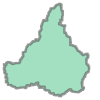

In [3]:
shapes = list(rasterio.features.shapes(im))
shape = shapes[0][0]['coordinates'][0]
for i, coord in enumerate(shape):
    x, y = coord
    shape[i] = ((x - 1) / 240 + x0, (y - 1) / 240 + y1)
maroni = shapely.geometry.Polygon(shape)
maroni

# Oyapock

In [4]:
im = np.load('../data/oyapock_4.133333_-53.35_531_428.npy')
im2 = np.zeros((im.shape[0]+2, im.shape[1]+2), dtype='uint8')
im2[1:-1, 1:-1] = im
im = np.array(im2[::-1])
x0 = -53.35
x1 = x0 + 428 / 240
y0 = 4.133333
y1 = y0 - 531 / 240

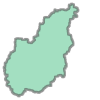

In [5]:
shapes = list(rasterio.features.shapes(im))
shape = shapes[0][0]['coordinates'][0]
for i, coord in enumerate(shape):
    x, y = coord
    shape[i] = ((x - 1) / 240 + x0, (y - 1) / 240 + y1)
oyapock = shapely.geometry.Polygon(shape)
oyapock

# Guyane administrative

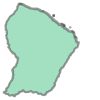

In [6]:
shape = fiona.open('../data/GUF_adm0.shp')
first = next(iter(shape))
guyane = shapely.geometry.shape(first['geometry'])
guyane

# Guyane hydrologique

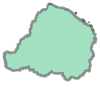

In [7]:
guyane_hydro = guyane.union(maroni).union(oyapock)
guyane_hydro

In [8]:
proj = partial(pyproj.transform, pyproj.Proj(init='epsg:4326'), pyproj.Proj(init='epsg:3857'))
guyane_area = transform(proj, guyane).area
guyane_hydro_area = transform(proj, guyane_hydro).area
print(f'La surface de la Guyane administrative est de {round(guyane_area * 1e-6)} km2.')
print(f'La surface de la Guyane "hydrologique" est de {round(guyane_hydro_area * 1e-6)} km2.')
print(f'La Guyane "hydrologique" est {round(guyane_hydro_area / guyane_area, 1)} fois plus grande que la Guyane administrative.')

La surface de la Guyane administrative est de 84273 km2.
La surface de la Guyane "hydrologique" est de 135488 km2.
La Guyane "hydrologique" est 1.6 fois plus grande que la Guyane administrative.
